이번에는 선형회귀를 알아보자. [혼자 공부하는 머신러닝+딥러닝](http://www.yes24.com/Product/Goods/96024871)의 챕터 3-2는 선형회귀를 다루는데 k-최근접 이웃의 한계와 같이 설명을 진행 한다. k-최근접 이웃의 경우에는 이웃인 k개수에 영향을 받게 되는데, 기존에 있는 데이터에 비해 조금이라도 큰 데이터를 예측 해야 하는 경우에 한계를 보인다. 지난 그림과 같이 다음을 비교 해보자.

이미지1

이제 이를 토대로 지난번 k-최근접 이웃 모델에 대해 50cm의 농어는 어떻게 예측을 하게 될지 한번 알아보자. 지난번 코드를 그대로 사용한다. 라이브러리는 지난번에 추가로 선형회귀에 사용할 sklearn.linear_model 패키지의 LinearRegression()를 추가로 넣어 준다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

####  k-최근접 이웃을 사용한 50cm 농어의 무게 예측

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

knr = KNeighborsRegressor(n_neighbors = 3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

이제 이 50cm길이의 농어에 대해 예측을 해보자.

In [4]:
print(knr.predict([[50]]))

[1033.33333333]


1,033g으로 예측을 햇는데, 실제로 농어의 무게는 훨씬 더 나간다고 한다. 이를 산점도로 파악해보자. 길이가 50이고 무게가 1,033인 농어는 초록색 세모로, 그 주변의 샘플은 주황색 마름모로 표시해두었따. 이를 통해 보면 길이가 커질수록 농어의 무게가 더 증가하는 경향이 있다. 이 이웃 샘플의 타깃의 평균을 구해보면 그대로 1033이 나오게 된다.더욱 심각한 문제는 아래의 모델로는 길이가 50이던 100이던 10000이던 주변의 타겟에 영향을 받기 때문에 모두 1033의 몸무게를 나타내게 된다.

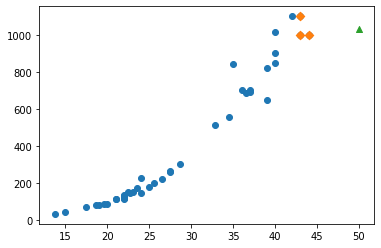

In [7]:
# 50cm 농어의 이웃을 구한다.
distances, indexes = knr.kneighbors([[50]])
    
# train set의 산점도를 그린다.
plt.scatter(train_input, train_target)

# train set중에서 이웃 샘플만 다시 그린다.
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

# 50cm 농어 데이터
plt.scatter(50,1033, marker = '^')
plt.show()

## 선형회귀


이제 선형 회귀에 대해 알아보자. 선형 회귀는 특성을 잘 나타낼 수 있는 직선을 학습 하는 알고리즘이다.각 선들의 집합에서 $y = a * x + b$를 찾아 내는 과정이다. 더 자세한 정보는 구글을 참고 하자. 사이킷런은 sklearn.linear_model 패키지 아래에 LionearRegression 클래스를 사용하여 농어에 대한 선형회귀를 진행 해보자.

In [8]:
lr = LinearRegression()

# 선형회귀 모델 훈련
lr.fit(train_input, train_target)

# 50cm 농에 대한 예측
print(lr.predict([[50]]))

[1241.83860323]


1,241g로 1,033g보다 더 높은 예측값이 나왔다. 이제 위에서 확인했던 직선의 방정식의 a,b를 찾아보자. 여기서 lr.coef_는 a를 뜻하는 기울기, lr.intercept_는 b를 나타내는 y절편을 의미한다. 다음을 해석해보면 다음과 같다.

- 기울기가 39인것으로 보아 농어의 길이가 1cm 증가 할때마다 무게는 39g 증가 하게 된다.

In [10]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


이제 농어의 길이 15 ~ 50까지를 직선으로 그려 보고 확인해보자.

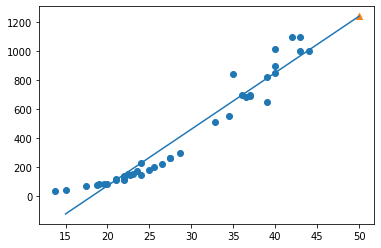

In [11]:
# 훈련 세트의 산점도 
plt.scatter(train_input, train_target)

# 15~50의 1차 방적식
plt.plot([15,50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker = '^')
plt.show()

이렇게 농어 데이터의 회귀에 대한 직선을 찾아내었다. 이제 $R^2$값을 한번 알아보자.

In [13]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


train set과 test set에 대한 점수차이가 조금 나게 된다. 이 원인을 파악하기 전에 저 그래프의 왼쪽 아래를 보자. 저 점들의 모양새는 직선이 아니라 곡선에 가까움을 확인할 수 있다.

## 다항회귀

이번에는 다항회귀에 대해 알아보자. 일직선이라기보다 왼쪽 위로 조금 구부러진 곡선에 가까우니 최적의 직선보다 최적의 곡선을 찾는 쪽으로 방향을 전환해보는 것이다. 2차 방정식의 그래프를 그리기 위해 우리는 길이를 제곱한 항으로 변경 해주자. 넘파이의 column_stack()함수를 사용하여 변경 해주자.

In [14]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

이제 train_poly를 사용해 선형 회귀 모델을 다시 훈련해주자. 이 모델이 2차 방정식의 $y = a*x^2 + b*x + c$의 a,b,c를 잘 찾는지 확인해 보려 한다.

In [17]:
lr = LinearRegression()
lr.fit(train_poly, train_target)


LinearRegression()

이렇게 생성된 모델에 대해 50cm 농어를 다시 예측 해보자. 1,573g로 기존 보다 더 높은 값을 예측 했다. 

In [18]:
print(lr.predict([[50**2, 50]]))

[1573.98423528]


이에 대한 a,b,c를 구하면 다음과 같다.

In [20]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


이제 이 모델에 대해 다시 한번 산점도를 그려 보자. 직전의 그림보다 더 좋은 그림

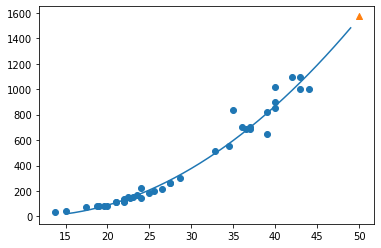

In [22]:
# 구간별 직선을 그리기 위해 15~49까지의 정수 배열 생성
point = np.arange(15,50)

# 훈련 세트의 산점도 생성
plt.scatter(train_input, train_target)

# 2차 방정식 그래프 생성
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

plt.scatter([50], [1574], marker = '^')
plt.show()

앞선 단순 선형 회귀 모델 보다 훨씬 나은 그래프가 그려진것을 확인 할 수 있다. 이제 $R^2$값을 알아보자. 이 값 역시 더 높아 진것을 확인 할수 있다.

In [24]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


## 총평
이로써 혼공머신의 3-2를 마무리 했다. 선형회귀에 대해 아주 간단히 알아보았으나, 아직 부족하다. 다음 장에서는 여러 모델을 배우게 될 것이며 추가로 여러 회귀 모델을 수집해서 다음엔 데이콘의 자료를 통해 준비 해보려 한다.